In [8]:
import tensorflow as tf
print(tf.__version__)

2.2.0


In [9]:
from tensorflow.keras.datasets import mnist
import os
current_dir = os.getcwd()
(x_train, y_train),(x_test, y_test) = mnist.load_data(path=current_dir+'/data/MNIST/mnist.npz')

x_train = x_train / 255
x_test = x_test / 255

print("x_train.shape",x_train.shape)

x_train.shape (60000, 28, 28)


6


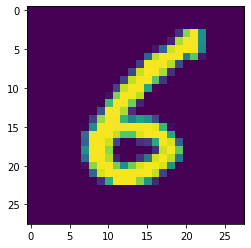

In [10]:
from matplotlib import pyplot as plt
import numpy as np
index = np.random.randint(0, high=59999, size=1)[0]
print(y_train[index])
plt.imshow(x_train[index])

In [11]:
# More imports
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import matplotlib.pyplot as plt

In [12]:
i = Input(shape=x_train[0].shape)
x = LSTM(128)(i)
x = Dense(10, activation='softmax')(x)

model = Model(i, x)

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3378 - accuracy: 0.8920 - val_loss: 0.1470 - val_accuracy: 0.9558
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1012 - accuracy: 0.9698 - val_loss: 0.0780 - val_accuracy: 0.9766
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0716 - accuracy: 0.9787 - val_loss: 0.0954 - val_accuracy: 0.9685
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0553 - accuracy: 0.9834 - val_loss: 0.0479 - val_accuracy: 0.9850
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0436 - accuracy: 0.9871 - val_loss: 0.0501 - val_accuracy: 0.9831
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0382 - accuracy: 0.9887 - val_loss: 0.0373 - val_accuracy: 0.9870
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0320 - accuracy: 0.9904 - val_loss: 0.0431 - val_accuracy:

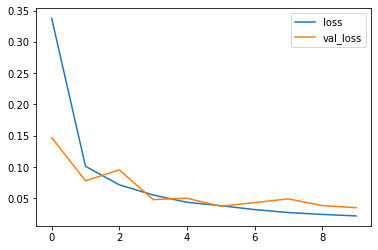

In [13]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

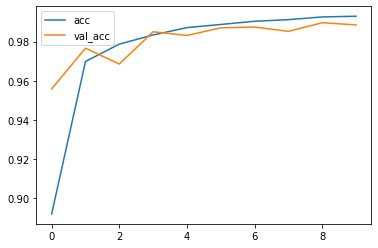

In [14]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

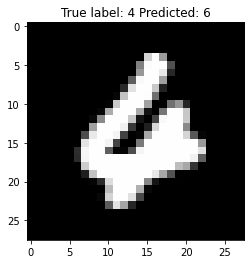

In [16]:
# Show some misclassified examples
p_test = model.predict(x_test).argmax(axis=1)
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));